In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

In [21]:
df=pd.read_csv('criminal_train.csv')
#df.describe()
X_train=df.iloc[:,0:70]
X_tra=X_train
for feature_name in X_train.columns:
        max_value = X_train[feature_name].max()
        min_value = X_train[feature_name].min()
        X_tra[feature_name] = (X_train[feature_name] - min_value) / (max_value - min_value)
#X_tra
y=df.iloc[:,-1]

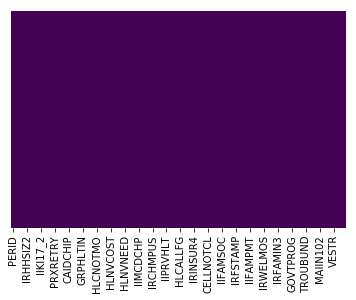

In [6]:
#sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Training

In [13]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()

In [41]:
log.fit(X_tra,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [42]:
np.set_printoptions(suppress=True)
df2=pd.read_csv('criminal_test.csv')
X_test=df2.iloc[:,1:71]
X_tes=X_test
for feature_name in X_test.columns:
        max_value = X_test[feature_name].max()
        min_value = X_test[feature_name].min()
        X_tes[feature_name] = (X_test[feature_name] - min_value) / (max_value - min_value)

In [43]:
pre = log.predict(X_tes)
pre

array([1, 1, 1, ..., 1, 1, 1])

In [35]:
for i in range(11430):
    if pre[i]==1:
        pre[i]=0
    elif pre[i]==0:
        pre[i]=1

In [36]:
df2 = df2.rename(columns={'100100': 'PERID'})
dataframe1=df2
dataframe1['Criminal']=pre
db=dataframe1.iloc[:,[0,71]]
#pd.read_csv('prediction.csv')
db.to_csv('test_Predictions.csv',index=None)